底图加载成功：高德地图


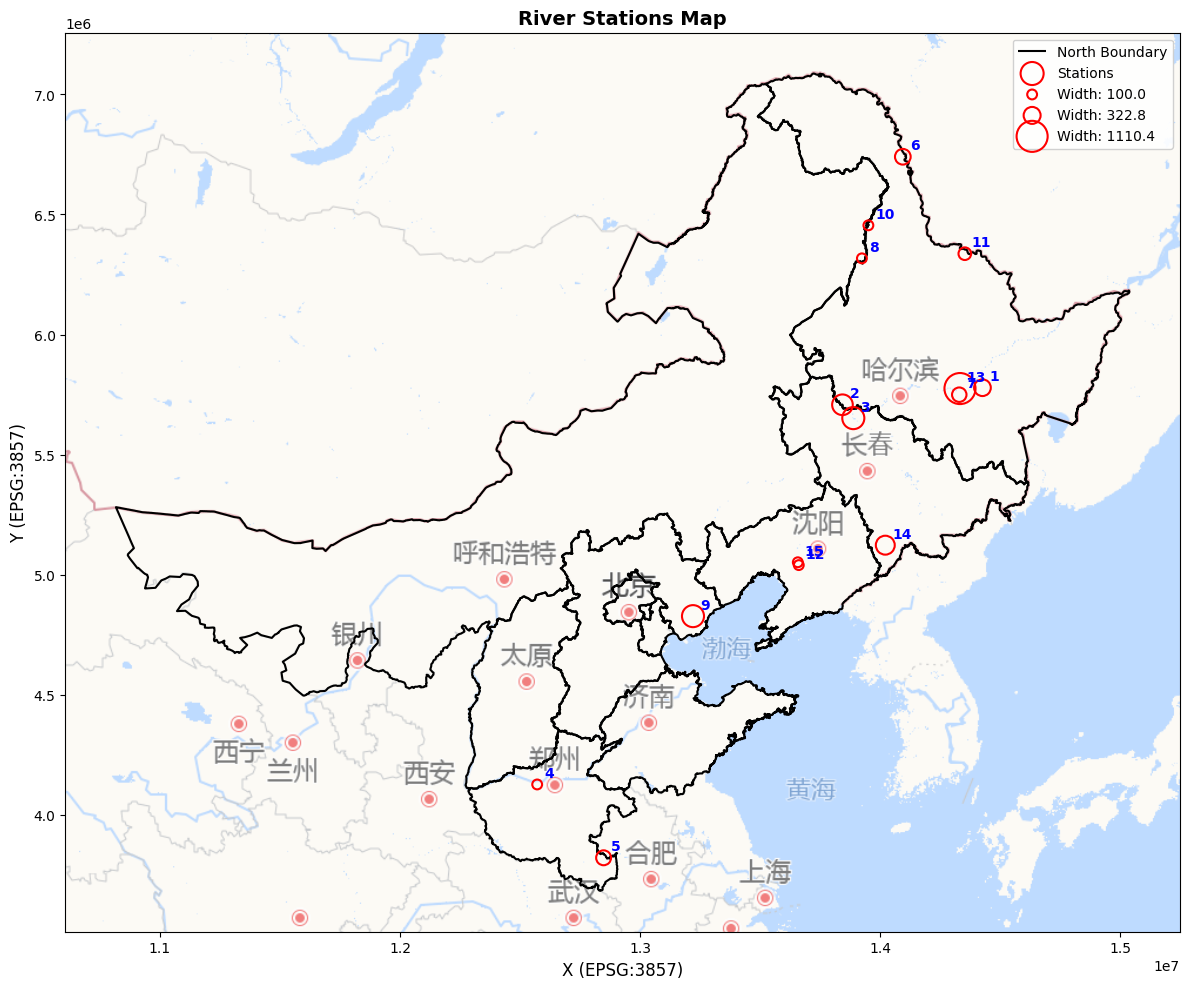

Map saved as 'river_stations_map.png'

站点编号对应关系:
  1: changjiangtun
  2: dalai
  3: fuyu
  4: heishiguan
  5: huaibin
  6: humaqiao
  7: lianhua
  8: liujiatun
  9: luanxian
  10: shihuiyao
  11: shuanghetun
  12: tangmazhai
  13: tonghe
  14: tonghua
  15: xingjiawopeng


In [1]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

# Read data
polygon_df = gpd.read_file('./1-buffer-match/North.shp', ignore_geometry=False, columns=[])
gdfs = gpd.read_file('1-buffer-match/600mRiverReach-straightBuffer-corrected-20station.shp')
gdfs = gdfs.rename(columns={'stnmpy': 'stationid'})

df_list = pd.read_csv('./3-process/5.q_kge_med_modified_q50_iqr_node_1.5_noqa_VersionD.csv')
station_list = df_list['stationid'].unique().tolist()

gdfs = gdfs[gdfs['stationid'].isin(station_list)]
gdfs = gdfs[~gdfs['stationid'].isin(['longmenzhen'])]
gdfs = gdfs.sort_values(by='stationid', ascending=True).reset_index(drop=True)

# Create figure
fig, ax = plt.subplots(figsize=(12, 10))

# Reproject to Web Mercator (EPSG:3857) for basemap compatibility
polygon_df_3857 = polygon_df.to_crs(epsg=3857)
gdfs_3857 = gdfs.to_crs(epsg=3857)

# 2. Draw polygon_df boundaries (no fill, only edges)
polygon_df_3857.boundary.plot(
    ax=ax,
    color='black',
    linewidth=1.5,
    label='North Boundary'
)

# 3. Plot gdfs points as hollow circles with size based on Width
sizes = gdfs_3857['Width'].values
size_min, size_max = 50, 500
sizes_normalized = (sizes - sizes.min()) / (sizes.max() - sizes.min()) * (size_max - size_min) + size_min

# Get centroid coordinates for point plotting
if gdfs_3857.geometry.iloc[0].geom_type in ['Polygon', 'MultiPolygon', 'LineString', 'MultiLineString']:
    x = gdfs_3857.geometry.centroid.x.values
    y = gdfs_3857.geometry.centroid.y.values
else:
    x = gdfs_3857.geometry.x.values
    y = gdfs_3857.geometry.y.values

# Plot hollow circles
scatter = ax.scatter(
    x, y,
    s=sizes_normalized,
    facecolors='none',
    edgecolors='red',
    linewidths=1.5,
    label='Stations',
    zorder=5
)

# Add station number labels (1-15)
for i, (xi, yi) in enumerate(zip(x, y)):
    ax.annotate(
        str(i + 1),  # 标注编号 1-15
        xy=(xi, yi),
        xytext=(5, 5),  # 偏移量
        textcoords='offset points',
        fontsize=10,
        fontweight='bold',
        color='blue',
        zorder=6
    )

# 1. Add basemap - 使用中国可访问的底图源
# 选项1: 高德地图
gaode_url = 'http://wprd01.is.autonavi.com/appmaptile?x={x}&y={y}&z={z}&lang=zh_cn&size=1&scl=1&style=7'

# 选项2: 天地图 (需要token，这里用备用方案)
# tianditu_url = 'http://t0.tianditu.gov.cn/vec_w/wmts?SERVICE=WMTS&REQUEST=GetTile&VERSION=1.0.0&LAYER=vec&STYLE=default&TILEMATRIXSET=w&FORMAT=tiles&TILEMATRIX={z}&TILEROW={y}&TILECOL={x}&tk=YOUR_TOKEN'

# 选项3: 如果以上都不行，使用简单背景
try:
    ctx.add_basemap(
        ax,
        source=gaode_url,
        alpha=0.7
    )
    print("底图加载成功：高德地图")
except Exception as e:
    print(f"高德地图加载失败: {e}")
    try:
        # 尝试 Stadia Maps (部分地区可用)
        stadia_url = 'https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}.png'
        ctx.add_basemap(ax, source=stadia_url, alpha=0.7)
        print("底图加载成功：Stadia Maps")
    except Exception as e2:
        print(f"Stadia Maps加载失败: {e2}")
        # 最后方案：不使用在线底图，设置简单背景
        ax.set_facecolor('#f0f0f0')
        print("使用简单灰色背景")

# Add legend for circle sizes
legend_sizes = [sizes.min(), sizes.mean(), sizes.max()]
legend_labels = [f'Width: {s:.1f}' for s in legend_sizes]
legend_sizes_normalized = [(s - sizes.min()) / (sizes.max() - sizes.min()) * (size_max - size_min) + size_min 
                           for s in legend_sizes]

for size, label in zip(legend_sizes_normalized, legend_labels):
    ax.scatter([], [], s=size, facecolors='none', edgecolors='red', linewidths=1.5, label=label)

ax.legend(loc='upper right', fontsize=10, framealpha=0.9)

# Set title and labels
ax.set_title('River Stations Map', fontsize=14, fontweight='bold')
ax.set_xlabel('X (EPSG:3857)', fontsize=12)
ax.set_ylabel('Y (EPSG:3857)', fontsize=12)

plt.tight_layout()
plt.savefig('river_stations_map.png', dpi=300, bbox_inches='tight')
plt.show()

print("Map saved as 'river_stations_map.png'")

# 打印站点对应关系
print("\n站点编号对应关系:")
for i, row in gdfs.iterrows():
    print(f"  {gdfs.index.get_loc(i) + 1}: {row['stationid']}")

底图加载成功：ArcGIS World Terrain


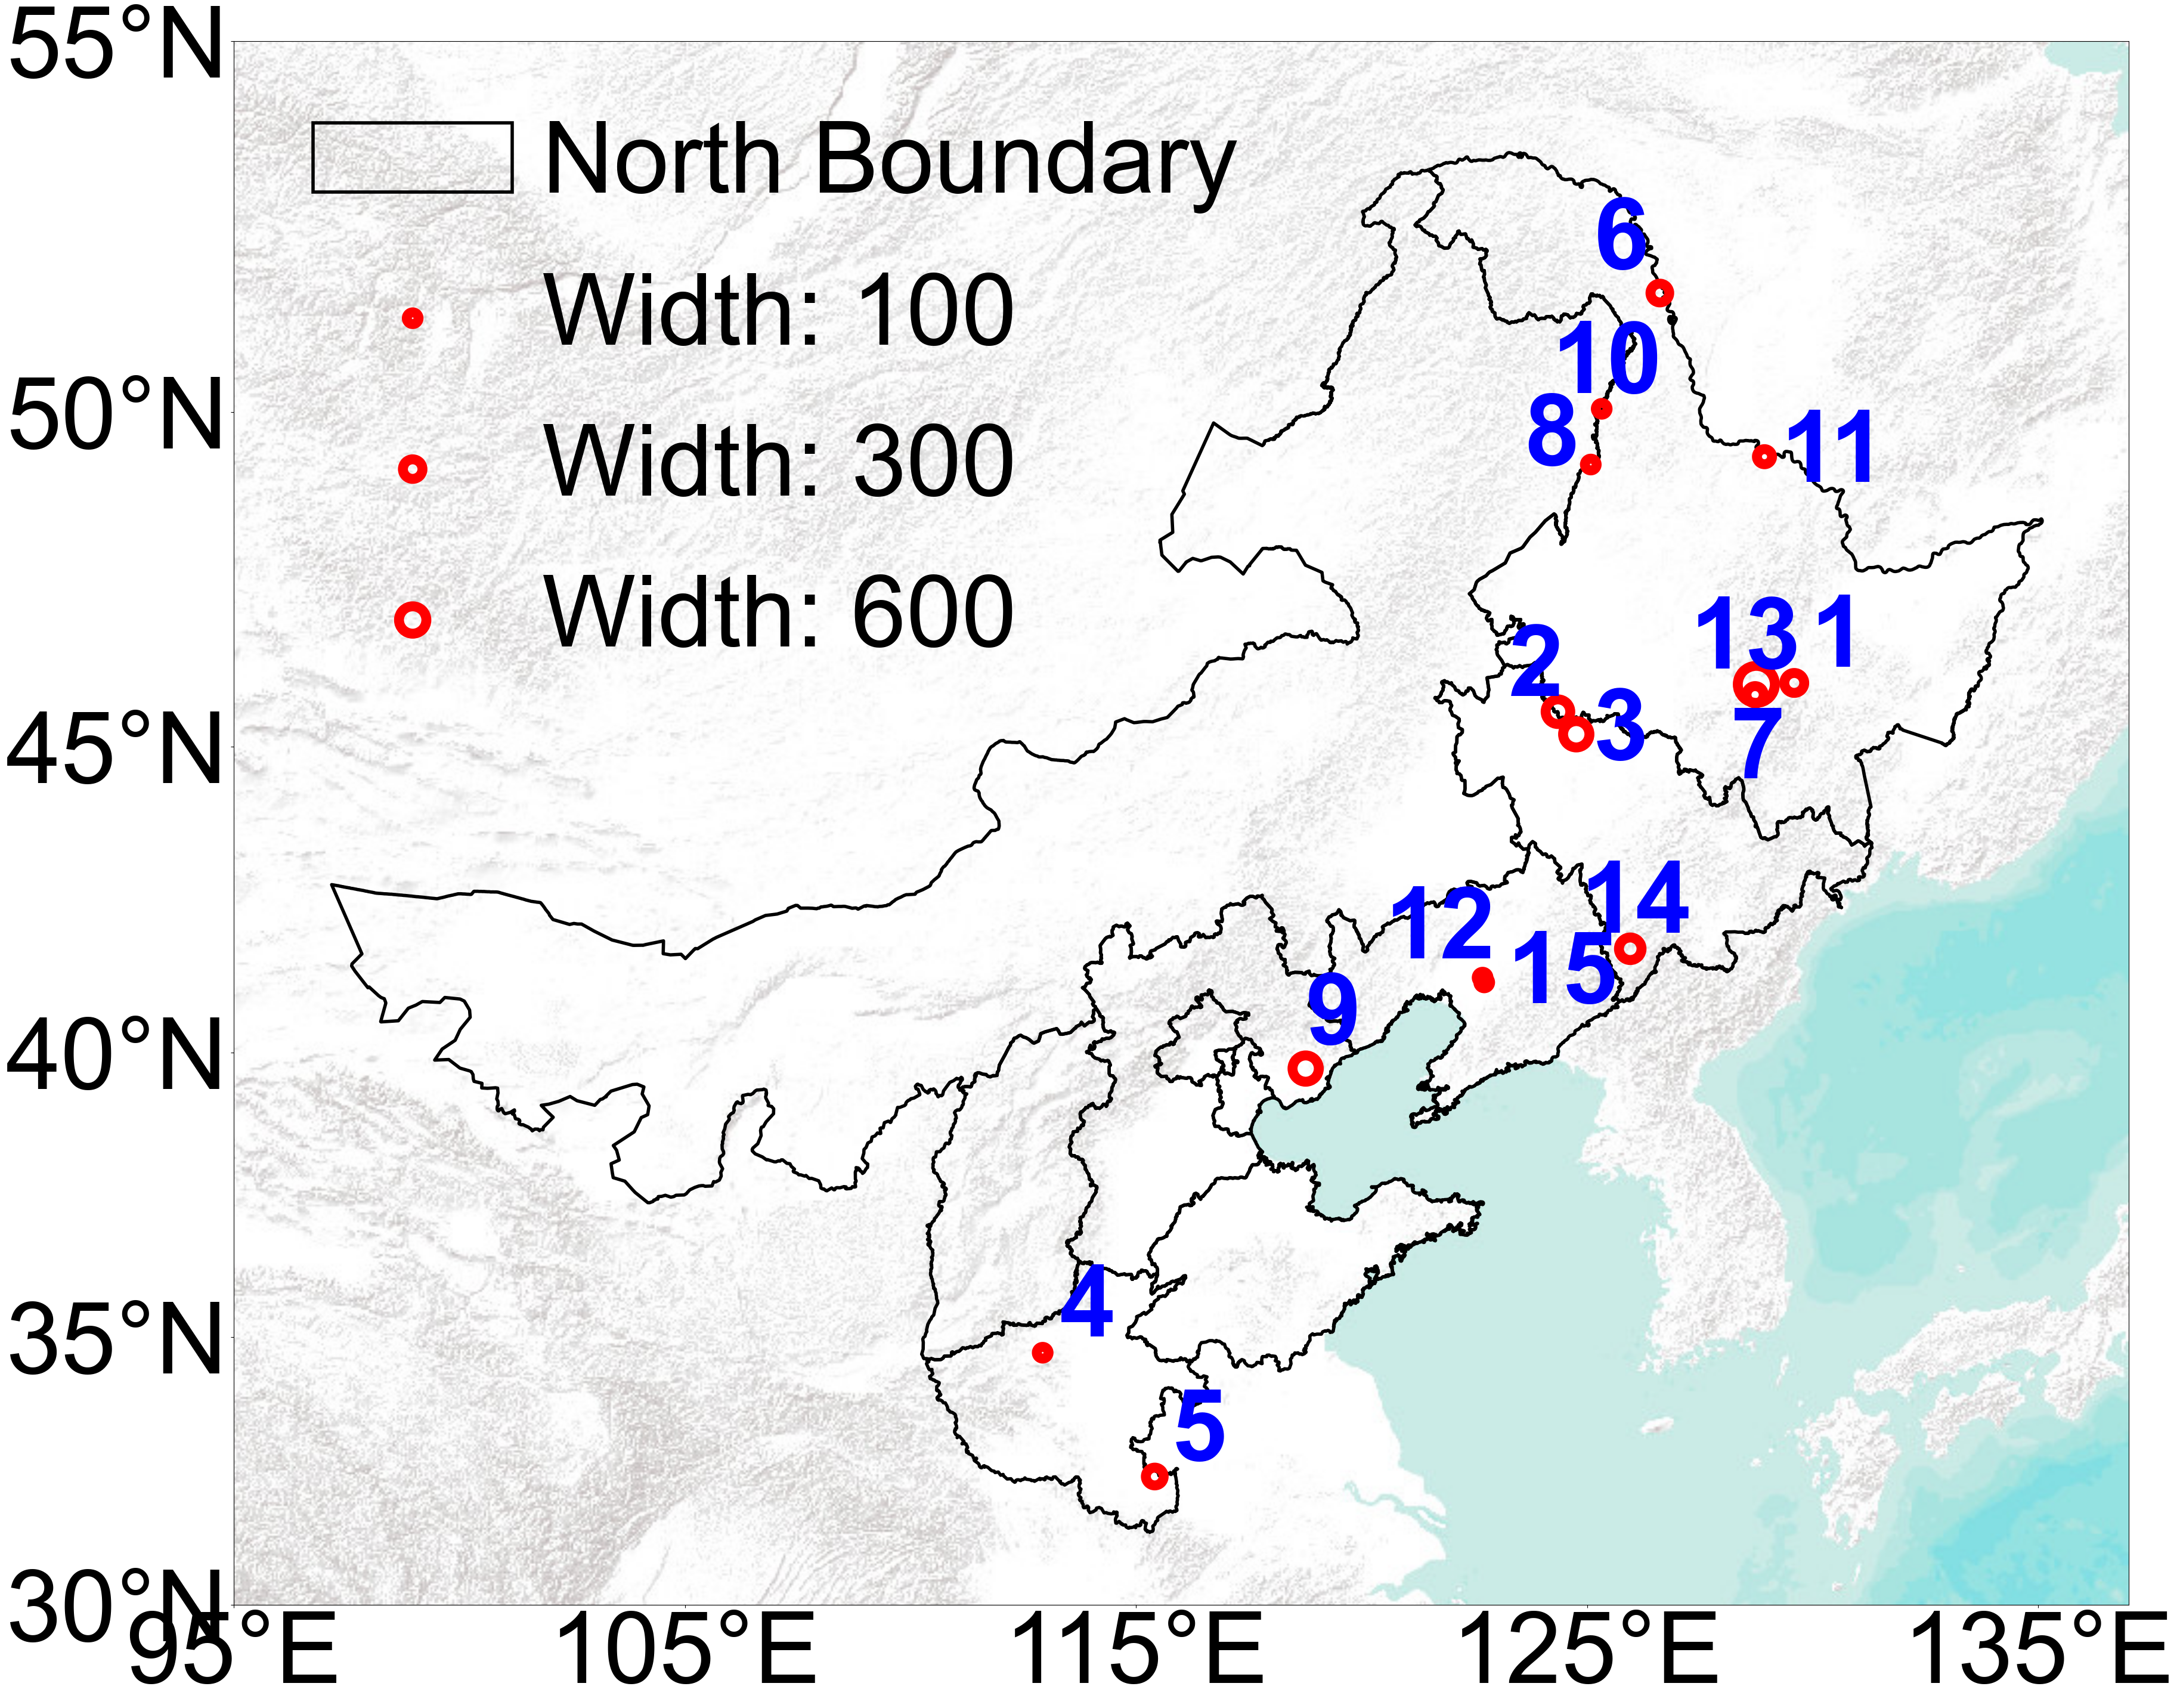


Map saved as 'Fig1a'

站点编号对应关系:
  1: changjiangtun (Width: 311.9)
  2: dalai (Width: 483.8)
  3: fuyu (Width: 555.1)
  4: heishiguan (Width: 100.0)
  5: huaibin (Width: 246.2)
  6: humaqiao (Width: 274.0)
  7: lianhua (Width: 230.8)
  8: liujiatun (Width: 100.0)
  9: luanxian (Width: 552.5)
  10: shihuiyao (Width: 100.0)
  11: shuanghetun (Width: 173.5)
  12: tangmazhai (Width: 100.0)
  13: tonghe (Width: 1110.4)
  14: tonghua (Width: 404.5)
  15: xingjiawopeng (Width: 100.0)


In [6]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
from pyproj import Transformer

# 设置字体和字体大小（调整为120-150范围）
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 120
plt.rcParams['axes.titlesize'] = 130
plt.rcParams['axes.labelsize'] = 125
plt.rcParams['xtick.labelsize'] = 120
plt.rcParams['ytick.labelsize'] = 120
plt.rcParams['legend.fontsize'] = 120
plt.rcParams['legend.title_fontsize'] = 125

# Read data
polygon_df = gpd.read_file('./1-buffer-match/North.shp', ignore_geometry=False, columns=[])
gdfs = gpd.read_file('1-buffer-match/600mRiverReach-straightBuffer-corrected-20station.shp')
gdfs = gdfs.rename(columns={'stnmpy': 'stationid'})

df_list = pd.read_csv('./3-process/5.q_kge_med_modified_q50_iqr_node_1.5_noqa_VersionD.csv')
station_list = df_list['stationid'].unique().tolist()

gdfs = gdfs[gdfs['stationid'].isin(station_list)]
gdfs = gdfs[~gdfs['stationid'].isin(['longmenzhen'])]
gdfs = gdfs.sort_values(by='stationid', ascending=True).reset_index(drop=True)

# Create figure - 增大图形尺寸以适应特大字体
fig, ax = plt.subplots(figsize=(40, 35))

# Reproject to Web Mercator (EPSG:3857) for basemap compatibility
polygon_df_3857 = polygon_df.to_crs(epsg=3857)
gdfs_3857 = gdfs.to_crs(epsg=3857)

# 创建转换器
transformer_to_3857 = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
transformer_to_4326 = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)

# 设置整数经纬度范围
lon_min, lon_max = 95, 137  # 经度范围
lat_min, lat_max = 30, 55   # 纬度范围

# 转换为 EPSG:3857 坐标
x_min, y_min = transformer_to_3857.transform(lon_min, lat_min)
x_max, y_max = transformer_to_3857.transform(lon_max, lat_max)

# 设置坐标范围
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# 2. Draw polygon_df boundaries (no fill, only edges)
polygon_df_3857.boundary.plot(
    ax=ax,
    color='black',
    linewidth=4.0,  # 加粗边界线以适应大字体
    label='North Boundary'
)

# 3. Plot gdfs points as hollow circles with size based on Width
sizes = gdfs_3857['Width'].values
size_min, size_max = 200, 2000  # 增大点的大小
sizes_normalized = (sizes - sizes.min()) / (sizes.max() - sizes.min()) * (size_max - size_min) + size_min

# Get centroid coordinates for point plotting
if gdfs_3857.geometry.iloc[0].geom_type in ['Polygon', 'MultiPolygon', 'LineString', 'MultiLineString']:
    x = gdfs_3857.geometry.centroid.x.values
    y = gdfs_3857.geometry.centroid.y.values
else:
    x = gdfs_3857.geometry.x.values
    y = gdfs_3857.geometry.y.values

# Plot hollow circles
scatter = ax.scatter(
    x, y,
    s=sizes_normalized,
    facecolors='none',
    edgecolors='red',
    linewidths=12.0,  # 加粗点边缘
    label='Stations',
    zorder=5
)

# Add station number labels (1-15) with larger font and NO white background
# 调整偏移量以适应特大的字体
offsets = [
    (20, 20),      # 1 右上
    (-60, 20),     # 2 左上
    (20, -30),     # 3 右下
    (20, 20),      # 4 左下
    (20, 20),      # 5 右上
    (-80, 30),     # 6 左上
    (-30, -100),   # 7 下
    (-80, 0),      # 8 左
    (0, 30),       # 9 上
    (-60, 20),     # 10 左上
    (20, -30),     # 11 右下
    (-120, 30),    # 12 左下
    (-80, 20),     # 13 左上
    (-60, 20),     # 14 左上
    (30, -30),     # 15 右下
]

for i, (xi, yi) in enumerate(zip(x, y)):
    offset = offsets[i % len(offsets)]
    ax.annotate(
        str(i + 1),
        xy=(xi, yi),
        xytext=offset,
        textcoords='offset points',
        fontsize=120,  # 增大标注字体大小
        fontweight='bold',
        color='blue',
        zorder=6
        # 去掉bbox参数，去除半透明白底
    )

# 1. Add terrain basemap
arcgis_terrain = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Terrain_Base/MapServer/tile/{z}/{y}/{x}'
arcgis_shaded = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}'
arcgis_topo = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}'
arcgis_physical = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Physical_Map/MapServer/tile/{z}/{y}/{x}'

terrain_sources = [
    (arcgis_terrain, "ArcGIS World Terrain"),
    (arcgis_shaded, "ArcGIS Shaded Relief"),
    (arcgis_topo, "ArcGIS World Topo"),
    (arcgis_physical, "ArcGIS Physical Map"),
]

basemap_loaded = False
for source_url, source_name in terrain_sources:
    try:
        ctx.add_basemap(ax, source=source_url, alpha=0.8)
        print(f"底图加载成功：{source_name}")
        basemap_loaded = True
        break
    except Exception as e:
        print(f"{source_name} 加载失败: {e}")
        continue

if not basemap_loaded:
    ax.set_facecolor('#e8e4d8')
    print("使用简单背景色")

# 设置x轴刻度（经度）- 整数
lon_ticks = np.arange(lon_min, lon_max + 1, 10)  # 每10度一个刻度: 95, 105, 115, 125, 135
x_ticks = [transformer_to_3857.transform(lon, (lat_min + lat_max) / 2)[0] for lon in lon_ticks]
x_labels = [f'{int(lon)}°E' for lon in lon_ticks]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=120)  # 增大坐标轴标签字体

# 设置y轴刻度（纬度）- 整数
lat_ticks = np.arange(lat_min, lat_max + 1, 5)  # 每5度一个刻度: 30, 35, 40, 45, 50, 55
y_ticks = [transformer_to_3857.transform((lon_min + lon_max) / 2, lat)[1] for lat in lat_ticks]
y_labels = [f'{int(lat)}°N' for lat in lat_ticks]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=120)  # 增大坐标轴标签字体

# Add legend for circle sizes - 使用固定的宽度值 100, 300, 600
legend_widths = [100, 300, 600]
legend_labels = [f'Width: {w}' for w in legend_widths]

width_min = sizes.min()
width_max = sizes.max()
legend_sizes_normalized = [
    (w - width_min) / (width_max - width_min) * (size_max - size_min) + size_min 
    for w in legend_widths
]

# 创建图例元素
legend_elements = [
    plt.scatter([], [], s=size, facecolors='none', edgecolors='red', linewidths=12.0, label=label)
    for size, label in zip(legend_sizes_normalized, legend_labels)
]

# 添加边界线的图例元素
from matplotlib.patches import Patch
boundary_element = Patch(facecolor='none', edgecolor='black', linewidth=4.0, label='North Boundary')

# 合并图例元素
all_elements = [boundary_element] + legend_elements

# 将图例放在左上角
legend = ax.legend(
    handles=all_elements,
    loc='upper left',  # 左上角
    fontsize=120,  # 增大图例字体
    framealpha=0.0,  # 设置图例背景完全透明
    edgecolor='black',  # 设置边框颜色
    borderpad=0.8,  # 内边距
    labelspacing=0.6,  # 标签间距
    handletextpad=0.3,  # 图例符号和文本之间的间距
    borderaxespad=0.0,  # 图例与坐标轴之间的距离为0
    frameon=False  # 关闭图例外框
)

# 设置标题和标签（如果需要）
# ax.set_title('River Stations Map (Terrain)', fontsize=130, fontweight='bold')
# ax.set_xlabel('Longitude', fontsize=125)
# ax.set_ylabel('Latitude', fontsize=125)

plt.tight_layout()
plt.savefig('Fig1a', dpi=300, bbox_inches='tight')
plt.show()

print("\nMap saved as 'Fig1a'")

# 打印站点对应关系
print("\n站点编号对应关系:")
for idx, (i, row) in enumerate(gdfs.iterrows()):
    print(f"  {idx + 1}: {row['stationid']} (Width: {row['Width']:.1f})")